In [1]:
#Price Prdictor for Okaya Real Estate Company
import pandas as pd
housing = pd.read_csv("data.csv")

In [2]:
housing.shape

(506, 14)

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS      RAD  TAX  PTRATIO  B       LSTAT  MEDV
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900   1    296  15.3     396.90  4.98   24.0    1
1.13081   0.0   8.14   0     0.538  5.713  94.1   4.2330   4    307  21.0     360.17  22.60  12.7    1
1.46336   0.0   19.58  0     0.605  7.489  90.8   1.9709   5    403  14.7     374.43  1.73   50.0    1
1.42502   0.0   19.58  0     0.871  6.510  100.0  1.7659   5    403  14.7     364.31  7.39   23.3    1
1.41385   0.0   19.58  1     0.871  6.129  96.0   1.7494   5    403  14.7     321.02  15.12  17.0    1
                                                                                                    ..
0.10959   0.0   11.93  0     0.573  6.794  89.3   2.3889   1    273  21.0     393.45  6.48   22.0    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5    384  20.9     393.49  13.00  21.7    1
0.10659   80.0  1.91   0     0.413  5.936  19.5   10.5857  4    334  22.0     

In [7]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

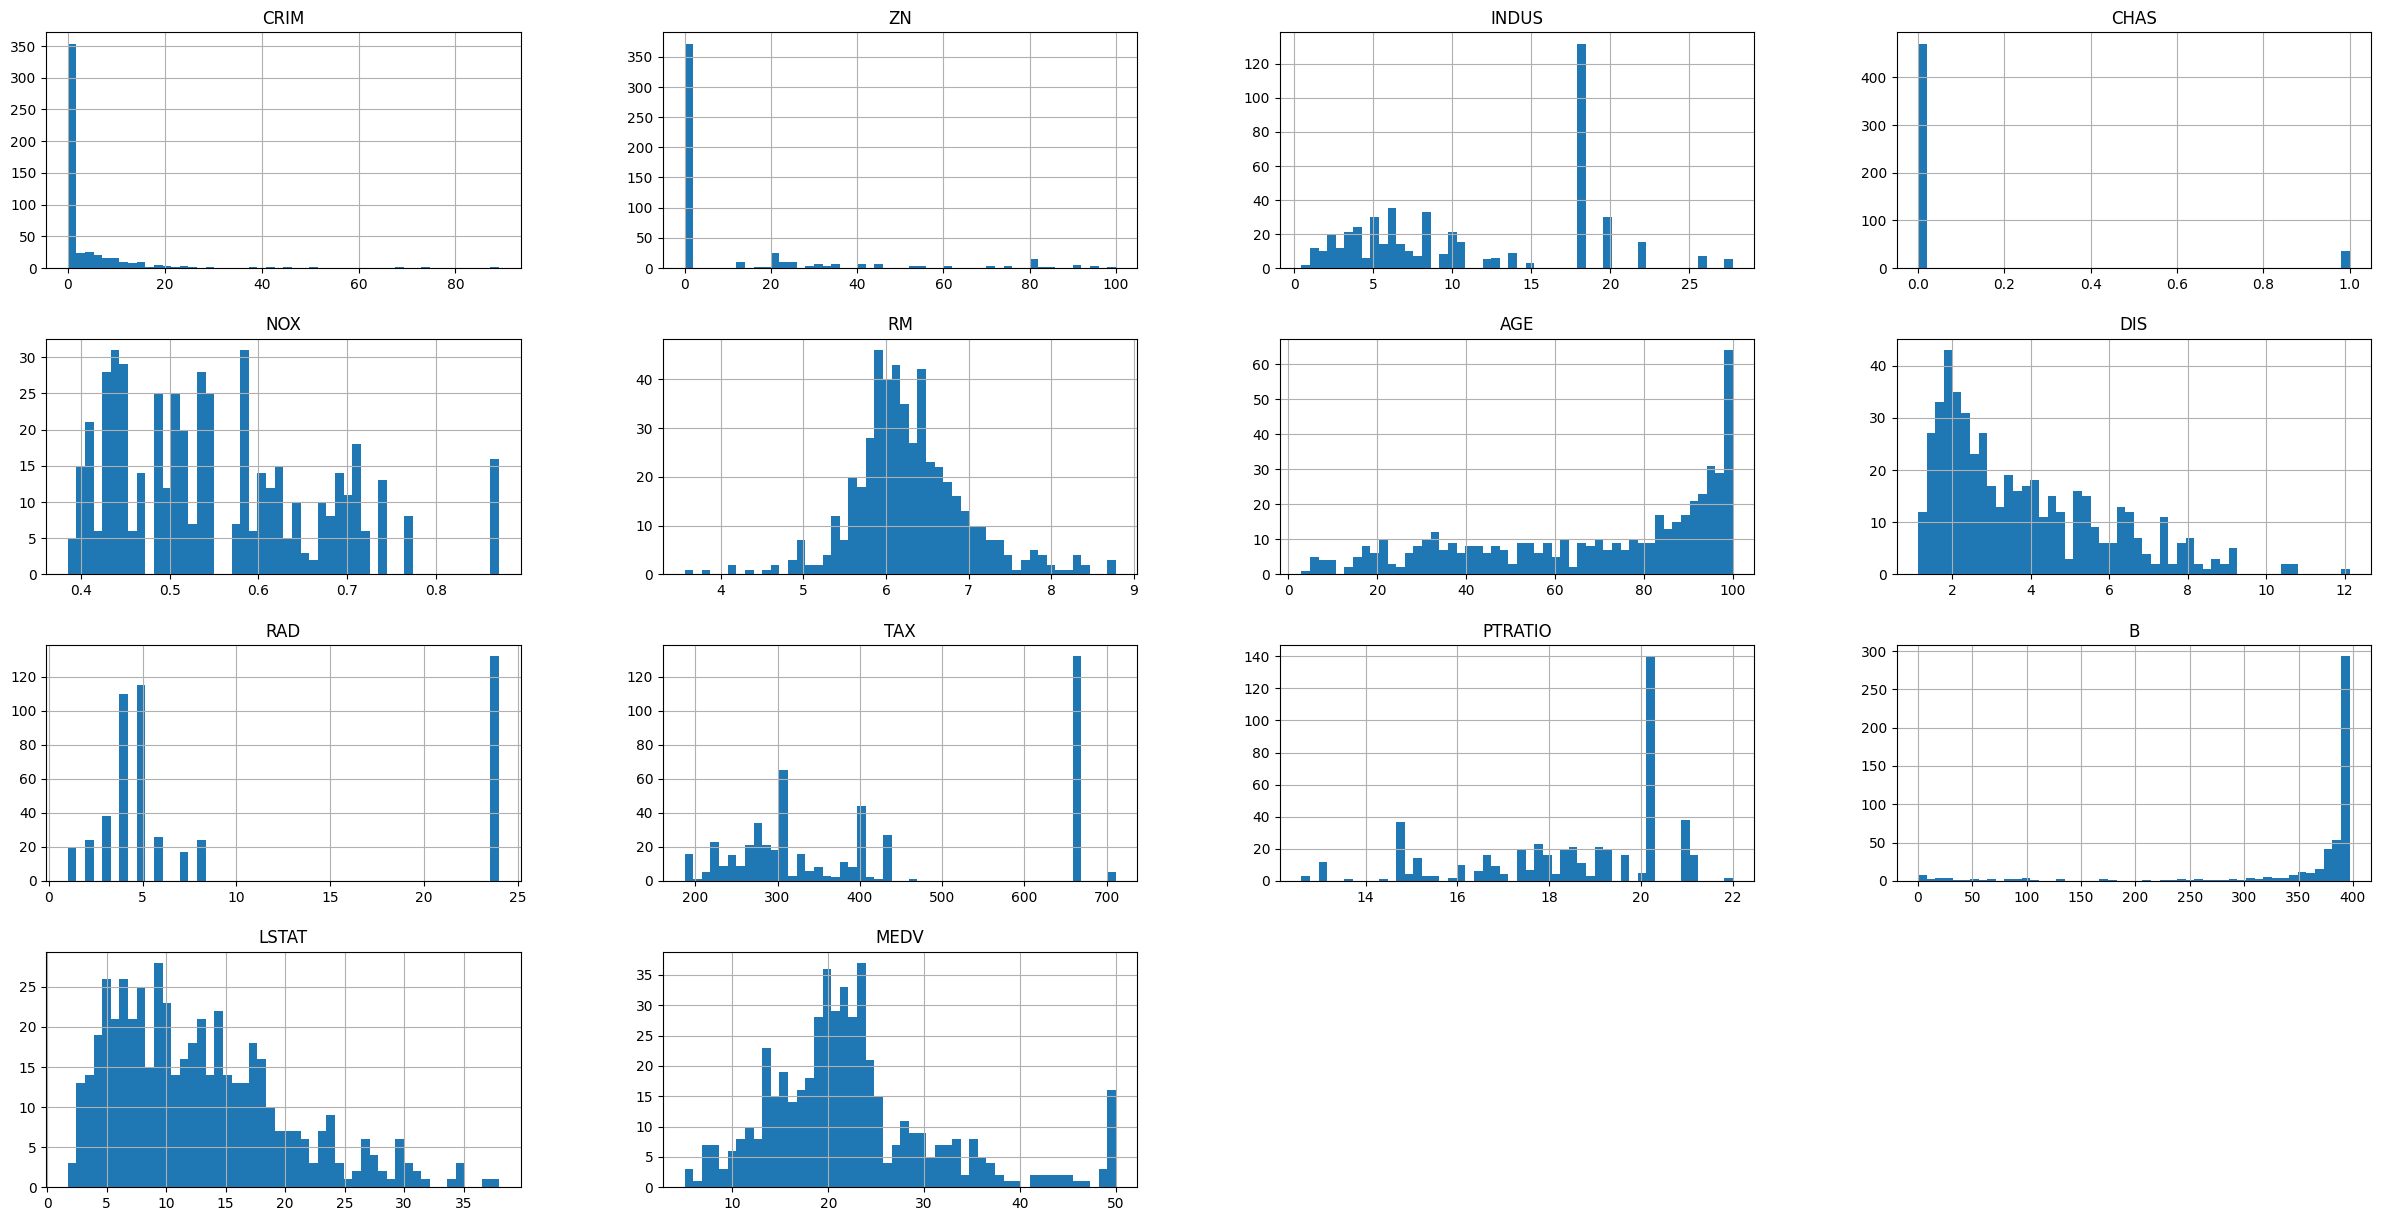

In [10]:
housing.hist(bins=50, figsize=(30,15))

In [11]:
import numpy as np

In [12]:
def split_train_test(data, test_ratio):
  shuffled = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled[:test_set_size]
  train_indices = shuffled[test_set_size:]
  return data.iloc[train_indices, data] , data.iloc[test_indices]


In [13]:
train_set, test_set = split_train_test(housing, 0.2)

IndexError: ignored

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [16]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [17]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [18]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
strat_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4


In [20]:
strat_train_set.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
216,0.04560,0.0,13.89,1,0.550,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3


In [21]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [24]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [22]:
# Stratified Train set
376/28

13.428571428571429

In [23]:
# Stratified Test Set
95/7

13.571428571428571

In [25]:
## CORRELATIONS where '1' means strong positive correlations
corr_matrix = housing.corr()

In [26]:
corr_matrix['CHAS'].sort_values(ascending=False)

CHAS       1.000000
MEDV       0.175260
RM         0.091468
NOX        0.091203
AGE        0.086518
INDUS      0.062938
B          0.048788
RAD       -0.007368
TAX       -0.035587
ZN        -0.042697
LSTAT     -0.053929
CRIM      -0.055892
DIS       -0.099176
PTRATIO   -0.121515
Name: CHAS, dtype: float64

In [27]:
corr_matrix['CHAS'].sort_values(ascending=True)

PTRATIO   -0.121515
DIS       -0.099176
CRIM      -0.055892
LSTAT     -0.053929
ZN        -0.042697
TAX       -0.035587
RAD       -0.007368
B          0.048788
INDUS      0.062938
AGE        0.086518
NOX        0.091203
RM         0.091468
MEDV       0.175260
CHAS       1.000000
Name: CHAS, dtype: float64

In [28]:
corr_matrix['RM'].sort_values(ascending=False)

RM         1.000000
MEDV       0.696169
ZN         0.311173
DIS        0.203507
B          0.128107
CHAS       0.091468
RAD       -0.210718
CRIM      -0.219433
AGE       -0.240286
TAX       -0.292794
NOX       -0.302751
PTRATIO   -0.357612
INDUS     -0.394193
LSTAT     -0.615721
Name: RM, dtype: float64

In [29]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

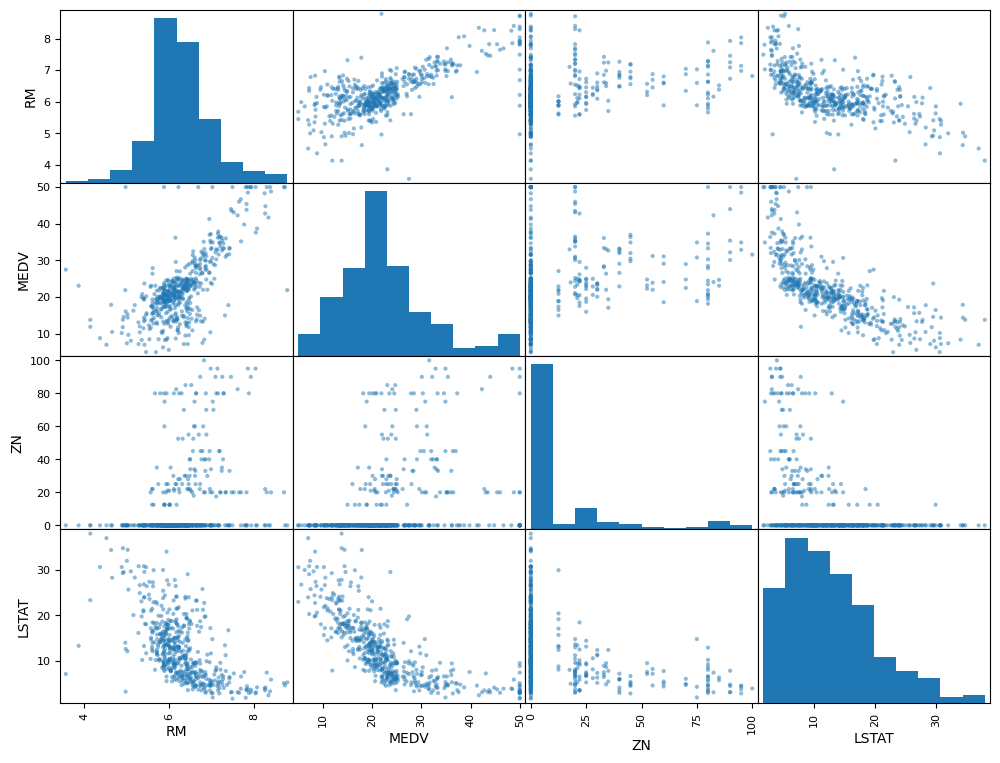

In [31]:
from pandas.plotting import scatter_matrix
attributes = ["RM", "MEDV", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,9))

<Axes: xlabel='RM', ylabel='MEDV'>

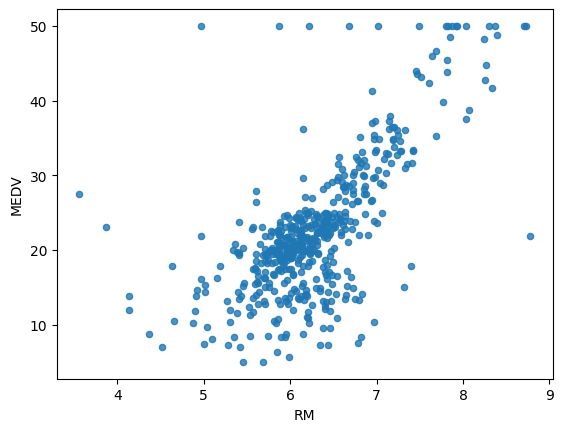

In [30]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.8)

In [56]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [32]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [33]:
housing["TAXRM"]

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [34]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [35]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.540380
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [36]:
# Missing Attributes
# To take care of missing attribute, you have three options
housing.dropna(subset=["MEDV"])
housing.shape

(506, 15)

In [37]:
a = housing.dropna(subset=["RM"])
a.shape

(501, 15)

In [38]:
housing.drop("RM", axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0,0.573,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0,0.573,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0,0.573,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,40.182514


In [40]:
median = housing["RM"].median()

In [41]:
housing["RM"].fillna(median)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [43]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20800000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36078965e+01])

In [44]:
X = imputer.transform(housing)

In [45]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [46]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.775162
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.322097
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.838179
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [47]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
 14  TAXRM    506 non-null    float64
dtypes: float64(15)
memory usage: 59.4 KB


In [48]:
housing_tr.shape

(506, 15)

In [59]:
#Scikit Learn Design
# Creating a pipeline
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = pipeline([('imputer', SimpleImputer(strategy = "medium")), ('std_scaler', StandardScaler())])

SyntaxError: ignored

In [54]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

NameError: ignored

In [55]:
housing_num_tr

NameError: ignored

In [61]:
some_data = housing.iloc[:5]

In [62]:
some_labels = housing_labels.iloc[:5]

In [63]:
prepared_data = pipeline.transform(Some_data)

AttributeError: ignored

In [64]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]